In [22]:
import pandas as pd
data = pd.read_csv("bottle.csv", low_memory=False)

# Shape
print("Original shape:", data.shape)  # Expected output: (864863, 74)

# Select features and remove Null values
selected_columns = ['T_degC', 'Salnty', 'STheta']
data_subset = data[selected_columns].dropna()

# Print shape after removing NaN values
print("Shape after removing NaN values:", data_subset.shape)  # Expected output: (812174, 3)

# Display the first few rows of the subset
print(data_subset.head())


Original shape: (864863, 74)
Shape after removing NaN values: (812174, 3)
   T_degC  Salnty  STheta
0   10.50  33.440  25.649
1   10.46  33.440  25.656
2   10.46  33.437  25.654
3   10.45  33.420  25.643
4   10.45  33.421  25.643


# PART A : DATA CLEANING

In [23]:
# Selecting the desired features
selected_features = ['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']
data_subset = data[selected_features]

In [24]:
# Removing rows with NaN values
data_subset = data_subset.dropna()
print("Shape after removing NaN values:", data_subset.shape)

Shape after removing NaN values: (661268, 5)


In [25]:
# Dealing with outliers based on extreme STheta values
threshold = 30  # Adjust threshold as needed
clean_data_subset = data_subset[data_subset['STheta'] < threshold]

# Verifying the shape of clean data
print("Shape for clean data:", clean_data_subset.shape)  # Expected output: (661268, 5)

Shape for clean data: (661268, 5)


# PART B: TRAIN/TEST SPLIT & SCALING 

In [31]:
import pandas as pd
import numpy as np

# Removing NaN or NA values
data = data[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']].dropna()

# Selecting the predictors (features) and the target variable
X = data[['Salnty', 'STheta', 'O2ml_L', 'Depthm']]
y = data['T_degC']

# Converting y to a numpy array and reshape
y = np.array(y).reshape(-1, 1)

# Displaying the shapes of X and y
print("Shape of X:", X.shape)  # Expected output: (661268, 4)
print("Shape of y:", y.shape)  # Expected output: (661268, 1)


Shape of X: (661268, 4)
Shape of y: (661268, 1)


In [32]:
# train and test sets split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting StandardScaler on training data and transform both training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shapes of X_train_scaled and X_test_scaled
print("Shape of X_train_scaled:", X_train_scaled.shape)  # Expected output: (529014, 4)
print("Shape of X_test_scaled:", X_test_scaled.shape)    # Expected output: (132254, 4)

Shape of X_train_scaled: (529014, 4)
Shape of X_test_scaled: (132254, 4)


# PART C: LINEAR REGRESSION WITH SKLEARN

Intercept: [10.91541795]
Coefficients: [[ 1.63046569 -4.6345913   0.3020677  -0.47495536]]
Mean Squared Error: 0.11101117205433629
R-Squared: 0.9937682503632342
Explained Variance Score: 0.9937684088237414


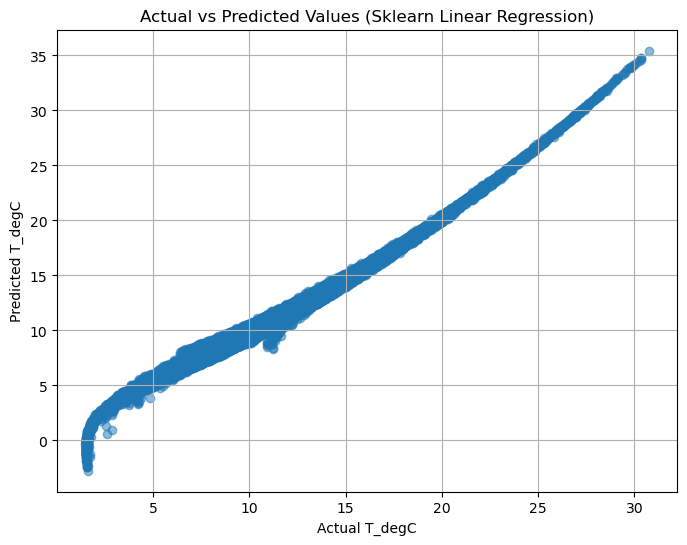

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

# 1) Create an instance
lin_reg = LinearRegression()

# Fitting lin_reg using X_train_scaled & y_train
lin_reg.fit(X_train_scaled, y_train)
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

y_pred_sklearn = lin_reg.predict(X_test_scaled)

# 4) Calculate the error on test 
mse = mean_squared_error(y_test, y_pred_sklearn)
r_squared = r2_score(y_test, y_pred_sklearn)
explained_variance = explained_variance_score(y_test, y_pred_sklearn)

print("Mean Squared Error:", mse)
print("R-Squared:", r_squared)
print("Explained Variance Score:", explained_variance)

# 5) Scatterplot that shows actual versus predicted values for the T_degC
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.title('Actual vs Predicted Values (Sklearn Linear Regression)')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.grid(True)
plt.show()


# Part D: Gradient Descent Mini-Batch

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

#Adding a column of 1s to X_train_scaled and X_test_scaled
X_train_scaled_with_intercept = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_with_intercept = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Mean Squared Error (MSE) cost function
def mse_cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    mse = mean_squared_error(y, predictions)
    return mse

def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, batch_size, eta=0.1, epochs=100):
    m, n = X_train.shape
    theta = np.random.randn(n, 1) 

    # Lists to store error metrics
    mse_test_history = []
    r_squared_history = []
    explained_variance_history = []

    # Mini-batch gradient descent
    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_train_shuffled = X_train[shuffled_indices]
        y_train_shuffled = y_train[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_train_shuffled[i:i+batch_size]
            yi = y_train_shuffled[i:i+batch_size]
            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= eta * gradients

        # Calculating predictions for test data
        y_pred_test = X_test.dot(theta)

        # Calculating error metrics for test data
        mse_test = mse_cost_function(X_test, y_test, theta)
        mse_test_history.append(mse_test)
        r_squared = r2_score(y_test, y_pred_test)
        r_squared_history.append(r_squared)
        explained_variance = explained_variance_score(y_test, y_pred_test)
        explained_variance_history.append(explained_variance)

    return mse_test_history, r_squared_history, explained_variance_history

# Step 4: Defining batch sizes and perform mini-batch gradient descent for each
batch_sizes = [50, 250, 2000]
results = {}
for batch_size in batch_sizes:
    mse_test, r_squared, explained_variance = mini_batch_gradient_descent(X_train_scaled_with_intercept, y_train, X_test_scaled_with_intercept, y_test, batch_size)
    results[batch_size] = {
        'mse_test': mse_test,
        'r_squared': r_squared,
        'explained_variance': explained_variance
    }



In [43]:
import pickle

# Save the results dictionary to a file
with open('mini_batch_results.pkl', 'wb') as f:
    pickle.dump(results, f)
with open('X_train_scaled_with_intercept.pkl', 'wb') as f:
    pickle.dump(X_train_scaled_with_intercept, f)

with open('X_test_scaled_with_intercept.pkl', 'wb') as f:
    pickle.dump(X_test_scaled_with_intercept, f)


In [44]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

#  Predictions for test data
y_pred_test = X_test_scaled_with_intercept.dot(theta)

#  Mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_test)

# Calculate explained variance
explained_variance = explained_variance_score(y_test, y_pred_test)

print("Mean Squared Error (MSE) for Test Data:", mse_test)
print("R-squared for Test Data:", r_squared)
print("Explained Variance for Test Data:", explained_variance)


Mean Squared Error (MSE) for Test Data: 150.20236873233395
R-squared for Test Data: -7.431796002756567
Explained Variance for Test Data: -0.6394635473229167


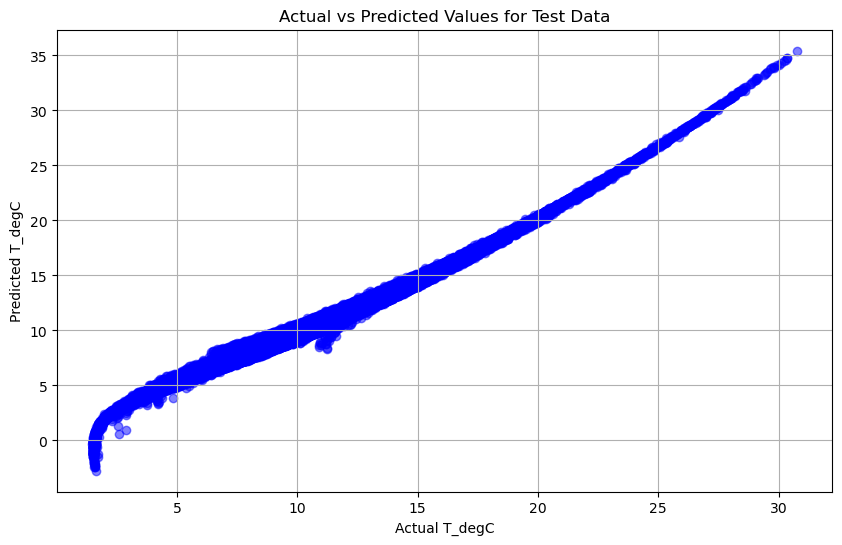

Mean Squared Error (MSE) for Training Data: 149.99205916037275
R-squared for Training Data: -7.400660028754897
Explained Variance for Training Data: -0.6404253132386577


In [45]:
import matplotlib.pyplot as plt

# Scatterplot for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sklearn, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values for Test Data')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.grid(True)
plt.show()

# Error Metrics for Training Data
y_pred_train = X_train_scaled_with_intercept.dot(theta)

# Error metrics for training data
mse_train = mse_cost_function(X_train_scaled_with_intercept, y_train, theta)
r_squared_train = r2_score(y_train, y_pred_train)
explained_variance_train = explained_variance_score(y_train, y_pred_train)

print("Mean Squared Error (MSE) for Training Data:", mse_train)
print("R-squared for Training Data:", r_squared_train)
print("Explained Variance for Training Data:", explained_variance_train)


# Part E: Conceptual Questions

#1.  Parameter estimation in Gradient Descent differs from using the normal equation as it iteratively updates parameters
#based on the gradient of the cost function, 
#while the normal equation computes parameters analytically

In [ ]:
#2. Mini-Batch Gradient Descent differs from Stochastic Gradient Descent by using a fixed batch of training examples 
#for computing the gradient, leading to smoother convergence but requiring more memory. 

In [ ]:
#3.I observed similar trends in both cases. Both the mean squared error (MSE) and the R-squared values are negative,
#indicating poor performance of the model on both the training and test data. Additionally, the explained variance 
#scores for both the training and test data are negative, indicating that the model does not explain 
#much of the variance in either dataset.model may suffer from issues such as underfitting or high bias, where it 
#fails to capture the underlying patterns in the data.

In [ ]:
#4. The learning rate determines the step size in gradient descent, influencing parameter updates during training. 
#Changing the learning rate over time through annealing can improve convergence stability and efficiency by adapting 
#dynamically during training.

In [ ]:
#5. Early stopping in gradient descent helps prevent overfitting by monitoring the model's performance on a validation 
#dataset during training and stopping the process when the performance starts to degrade. This prevents the model from 
#becoming overly complex and memorizing the training data, improving its ability to generalize to unseen data.
